In [1]:
import csv
import sys
import os
import pickle
import random
import numpy as np
import time
import operator
import seaborn as sns
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from collections import Counter

from math import sqrt
import statsmodels.stats.api as sms

import scipy.stats

In [2]:
save_fig=True

In [3]:
np.set_printoptions(precision=2)

In [4]:
sys.path.append('../python')
from permutation import permutation, compute_alignment_strength
from utils.utils_funcs import get_variance, get_distinctness, get_distinctness_from_nearest_5, aggregate_embeddings_visual_and_language
from utils.utils_funcs import load_data_to_dict

In [5]:
def get_alignment_strength(struct,concepts,relative):
    visual_embeddings_list=list()
    langauge_embeddings_list=list()
    for concept in concepts:
        embeddings=struct["embeds"][concept]
        visual_embeddings_list.append(embeddings["visual"])
        langauge_embeddings_list.append(embeddings["language"])
    z_0=np.array(visual_embeddings_list)
    z_1=np.array(langauge_embeddings_list)
    if relative:
        return permutation(z_0,z_1,n_sim=100)[0]
    else:
        return compute_alignment_strength(z_0,z_1)

----

In [6]:
vrd_noun_data=pickle.load(open("../data/dumped_embeddings/vrd_noun_least10_ll_swav_bert_10.pkl","rb"))
vrd_verb_data=pickle.load(open("../data/dumped_embeddings/vrd_verb_least10_ll_swav_bert_10.pkl","rb"))

aggregated_vrd_noun_data=aggregate_embeddings_visual_and_language(vrd_noun_data,10,10)
aggregated_vrd_verb_data=aggregate_embeddings_visual_and_language(vrd_verb_data,10,10)

In [7]:
noun_visual_variance,noun_language_variance=get_variance(vrd_noun_data)
verb_visual_variance,verb_language_variance=get_variance(vrd_verb_data)

In [8]:
noun_visual_distinctness,noun_language_distinctness=get_distinctness(vrd_noun_data)
verb_visual_distinctness,verb_language_distinctness=get_distinctness(vrd_verb_data)

----

In [9]:
def print_statistics(value_dict,name):
    print("mean "+name+":",np.mean(list(value_dict.values())),"95% confidence:",sms.DescrStatsW(list(value_dict.values())).tconfint_mean())

In [10]:
print("vrd noun visual:")
print_statistics(noun_visual_variance,"variance")

print("vrd verb visual:")
print_statistics(verb_visual_variance,"variance")

print("vrd noun language:")
print_statistics(noun_language_variance,"variance")

print("vrd verb language:")
print_statistics(verb_language_variance,"variance")

vrd noun visual:
mean variance: 0.7182887 95% confidence: (0.6922882083044581, 0.7442893569606936)
vrd verb visual:
mean variance: 0.8278966 95% confidence: (0.8057635867219289, 0.8500297449821207)
vrd noun language:
mean variance: 9.166189 95% confidence: (8.912492572879739, 9.419885454694334)
vrd verb language:
mean variance: 9.175647 95% confidence: (8.963306737484926, 9.38798740216121)


In [11]:
print("vrd noun visual:")
print_statistics(noun_visual_distinctness,"distinctness")

print("vrd verb visual:")
print_statistics(verb_visual_distinctness,"distinctness")

print("vrd noun language:")
print_statistics(noun_language_distinctness,"distinctness")

print("vrd verb language:")
print_statistics(verb_language_distinctness,"distinctness")

vrd noun visual:
mean distinctness: 1.0796810575208873 95% confidence: (1.0698811717772423, 1.0894809432645327)
vrd verb visual:
mean distinctness: 1.0113400560802053 95% confidence: (1.0024734193259, 1.020206692834511)
vrd noun language:
mean distinctness: 14.147195885435208 95% confidence: (13.943934923334142, 14.350456847536273)
vrd verb language:
mean distinctness: 13.324655995516641 95% confidence: (13.147468745090602, 13.501843245942684)


In [12]:
def t_test(variance1,variance2):
    print(scipy.stats.ttest_ind(list(variance1.values()),list(variance2.values())))

In [13]:
t_test(noun_visual_variance,verb_visual_variance)

Ttest_indResult(statistic=-6.44141797856579, pvalue=3.742867055223346e-09)


In [14]:
t_test(noun_language_variance,verb_language_variance)

Ttest_indResult(statistic=-0.057364451372046134, pvalue=0.9543649508370202)


In [15]:
t_test(noun_visual_distinctness,verb_visual_distinctness)

Ttest_indResult(statistic=10.376759579445544, pvalue=9.682106283635862e-18)


In [16]:
t_test(noun_language_distinctness,verb_language_distinctness)

Ttest_indResult(statistic=6.121104829018501, pvalue=1.6660023379528136e-08)


---

In [17]:
temp1=list(noun_visual_variance.values())+list(noun_visual_distinctness.values())+ \
    list(noun_language_variance.values())+list(noun_language_distinctness.values())
temp2=["visual_var"]*len(noun_visual_variance)+["visual_dis"]*len(noun_visual_distinctness)+ \
    ["lang_var"]*len(noun_language_variance)+["lang_dis"]*len(noun_language_distinctness)

df1=pd.DataFrame(dict(
    value=temp1,
    measure=temp2
))
df1["type"]="VRD Nouns"

In [18]:
temp1=list(verb_visual_variance.values())+list(verb_visual_distinctness.values())+ \
    list(verb_language_variance.values())+list(verb_language_distinctness.values())
temp2=["visual_var"]*len(verb_visual_variance)+["visual_dis"]*len(verb_visual_distinctness)+ \
    ["lang_var"]*len(verb_language_variance)+["lang_dis"]*len(verb_language_distinctness)
df2=pd.DataFrame(dict(
    value=temp1,
    measure=temp2
))
df2["type"]="VRD Verbs"

In [19]:
df=pd.concat([df1,df2])

In [20]:
# df

In [21]:
# sns.set_style('darkgrid')  # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)  # fontsize of the axes title
plt.rc('axes', labelsize=18)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)  # fontsize of the tick labels
plt.rc('ytick', labelsize=18)  # fontsize of the tick labels
plt.rc('legend', fontsize=18)  # legend fontsize
plt.rc('font', size=18)  # controls default text sizes
# plt.figure(figsize=(10, 6), tight_layout=True)

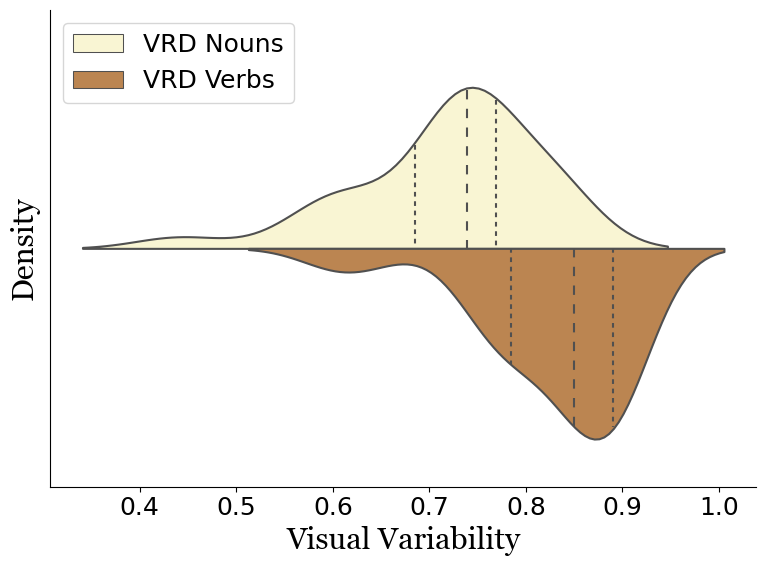

In [22]:
palette = ['lemonchiffon', 'peru']
fig, ax =plt.subplots(figsize=(8,6))
sns.violinplot(y="measure", x="value", hue="type",
                    data=df[df.measure=="visual_var"],split=True,palette=sns.color_palette(palette, 2),inner="quartile",ax=ax)
sns.despine()
ax.legend(loc=2)
ax.set_ylabel("Density",fontsize=22,fontname='Georgia')
ax.set_xlabel("Visual Variability",fontsize=22,fontname='Georgia')
ax.set_yticks([])
# ax.get_legend().remove()

plt.tight_layout()
if save_fig:
    plt.savefig("../figs/visual_var_vrd.png",dpi=600)
plt.show()

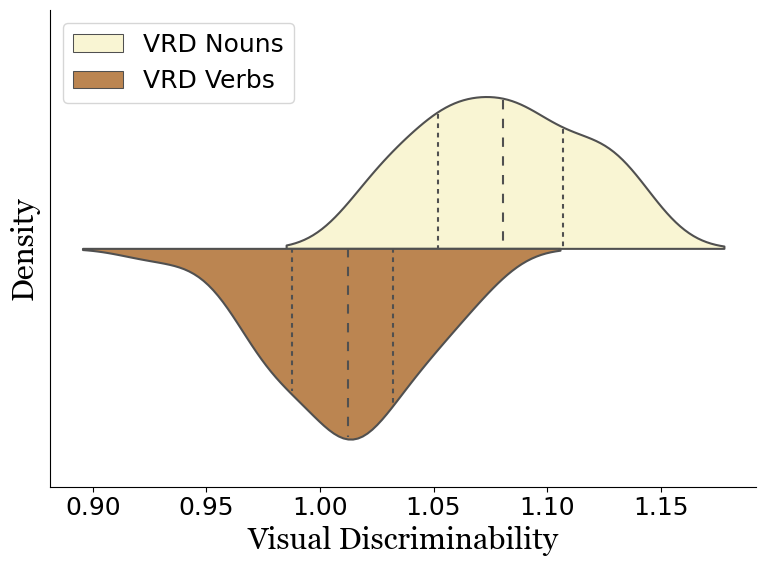

In [23]:
palette = ['lemonchiffon', 'peru']
fig, ax =plt.subplots(figsize=(8,6))
sns.violinplot(y="measure", x="value", hue="type",
                    data=df[df.measure=="visual_dis"],split=True,palette=sns.color_palette(palette, 2),inner="quartile",ax=ax)
sns.despine()
ax.legend(loc=2)
ax.set_ylabel("Density",fontsize=22,fontname='Georgia')
ax.set_xlabel("Visual Discriminability",fontsize=22,fontname='Georgia')
ax.set_yticks([])
# ax.get_legend().remove()

plt.tight_layout()
if save_fig:
    plt.savefig("../figs/visual_dis_vrd.png",dpi=600)
plt.show()

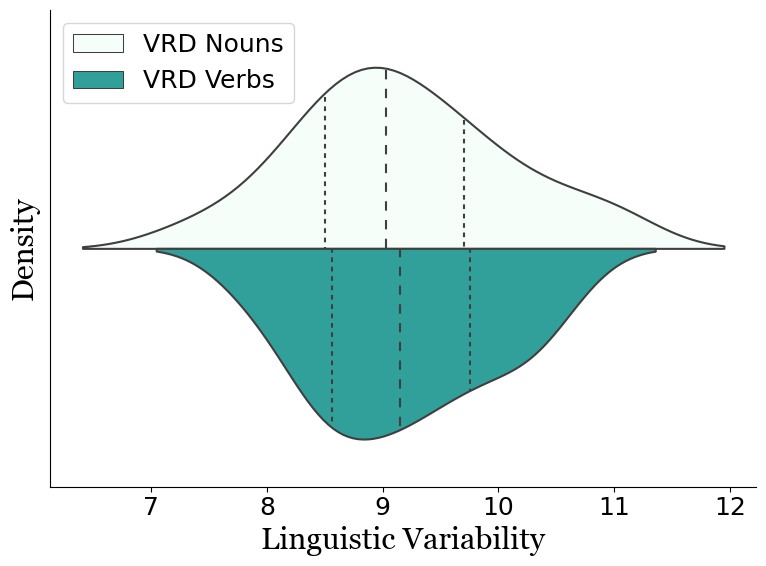

In [24]:
palette = ['mintcream', 'lightseagreen']
fig, ax =plt.subplots(figsize=(8,6))
sns.violinplot(y="measure", x="value", hue="type",
                    data=df[df.measure=="lang_var"],split=True,palette=sns.color_palette(palette, 2),inner="quartile",ax=ax)
sns.despine()
ax.legend(loc=2)
ax.set_ylabel("Density",fontsize=22,fontname='Georgia')
ax.set_xlabel("Linguistic Variability",fontsize=22,fontname='Georgia')
ax.set_yticks([])
# ax.get_legend().remove()

plt.tight_layout()
if save_fig:
    plt.savefig("../figs/lang_var_vrd.png",dpi=600)
plt.show()

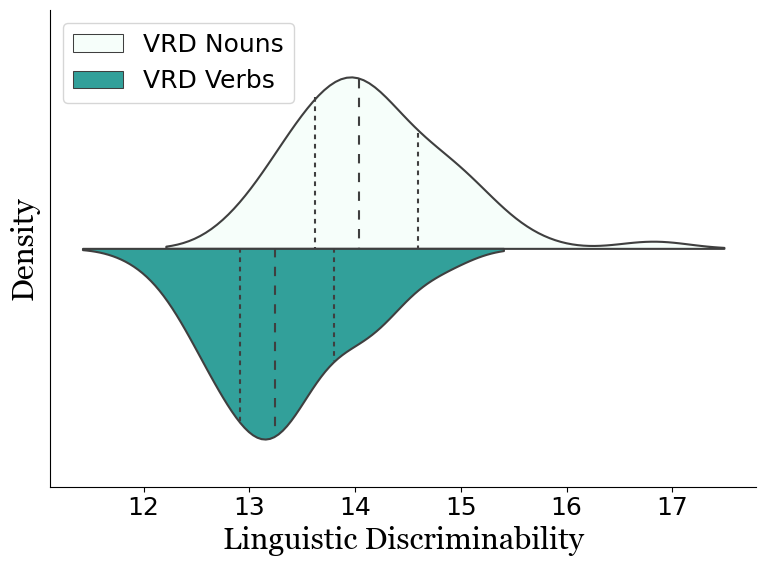

In [25]:
palette = ['mintcream', 'lightseagreen']
fig, ax =plt.subplots(figsize=(8,6))
sns.violinplot(y="measure", x="value", hue="type",
                    data=df[df.measure=="lang_dis"],split=True,palette=sns.color_palette(palette, 2),inner="quartile",ax=ax)
sns.despine()
ax.legend(loc=2)
ax.set_ylabel("Density",fontsize=22,fontname='Georgia')
ax.set_xlabel("Linguistic Discriminability",fontsize=22,fontname='Georgia')
ax.set_yticks([])
# ax.get_legend().remove()

plt.tight_layout()
if save_fig:
    plt.savefig("../figs/lang_dis_vrd.png",dpi=600)
plt.show()